In [1]:
# Library
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
# Baca Data
df = pd.read_csv('Dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

array([[<AxesSubplot:title={'center':'avg_glucose_level'}>]], dtype=object)

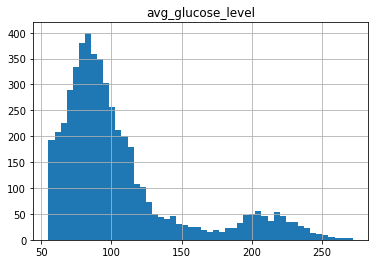

In [4]:
df.hist(column='avg_glucose_level', bins=50)

In [5]:
# Ngilangin data NaN
df.dropna(subset=['bmi'], inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# Proses PreProcessing
enc = LabelEncoder()

df['ever_married'] = enc.fit_transform(df['ever_married'].values)
df['work_type'] = enc.fit_transform(df['work_type'].values)
df['Residence_type'] = enc.fit_transform(df['Residence_type'].values)
df['smoking_status'] = enc.fit_transform(df['smoking_status'].values)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,Male,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,Female,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,Female,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,Male,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,Female,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,Female,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,Male,51.0,0,0,1,2,0,166.29,25.6,1,0


In [7]:
# Mengubah data frame ke array buat di tes
X = df[['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']] .values
X[0:5]

array([[ 67.  ,   0.  ,   1.  ,   1.  ,   2.  ,   1.  , 228.69,  36.6 ,
          1.  ,   1.  ],
       [ 80.  ,   0.  ,   1.  ,   1.  ,   2.  ,   0.  , 105.92,  32.5 ,
          2.  ,   1.  ],
       [ 49.  ,   0.  ,   0.  ,   1.  ,   2.  ,   1.  , 171.23,  34.4 ,
          3.  ,   1.  ],
       [ 79.  ,   1.  ,   0.  ,   1.  ,   3.  ,   0.  , 174.12,  24.  ,
          2.  ,   1.  ],
       [ 81.  ,   0.  ,   0.  ,   1.  ,   2.  ,   1.  , 186.21,  29.  ,
          1.  ,   1.  ]])

In [8]:
# Label data
y = df['gender'].values
y[0:5]

array(['Male', 'Male', 'Female', 'Female', 'Male'], dtype=object)

In [9]:
# Proses PreProcessing (2)/Normalisasi data 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.07013796, -0.31806673,  4.38196829,  0.72948428, -0.15569667,
         0.98563987,  2.77769839,  0.98134488, -0.35178804,  4.74215545],
       [ 1.64656262, -0.31806673,  4.38196829,  0.72948428, -0.15569667,
        -1.01456935,  0.0138418 ,  0.45926914,  0.58523176,  4.74215545],
       [ 0.27201152, -0.31806673, -0.22820795,  0.72948428, -0.15569667,
         0.98563987,  1.48413156,  0.70120668,  1.52225157,  4.74215545],
       [ 1.60222226,  3.14399438, -0.22820795,  0.72948428,  0.75965057,
        -1.01456935,  1.54919261, -0.62308299,  0.58523176,  4.74215545],
       [ 1.69090297, -0.31806673, -0.22820795,  0.72948428, -0.15569667,
         0.98563987,  1.82136844,  0.01359474, -0.35178804,  4.74215545]])

In [10]:
# Training dan Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print('Train set : ', X_train.shape, y_train.shape)
print('Test set : ', X_test.shape, y_test.shape)

Train set :  (4418, 10) (4418,)
Test set :  (491, 10) (491,)


In [11]:
# Traning data ke model KNN
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [12]:
# Prediksi dari model yang dibentuk
ythat = knn.predict(X_test)
ythat[0:5]

array(['Female', 'Female', 'Female', 'Female', 'Female'], dtype=object)

In [13]:
# Akurasi dari model yang dibentuk
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ythat))

Train set Accuracy:  0.7184246265278407
Test set Accuracy:  0.5580448065173116
